In [35]:
import seaborn as sns
import numpy as py

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


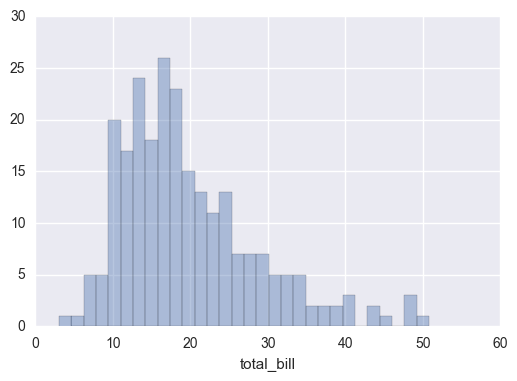

In [10]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

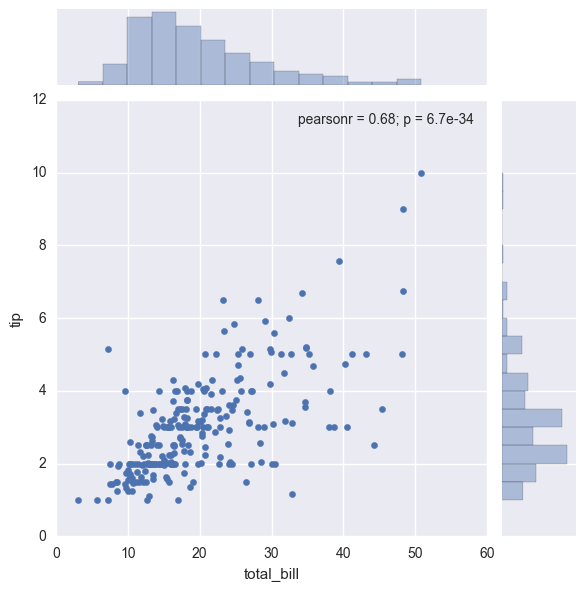

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips)

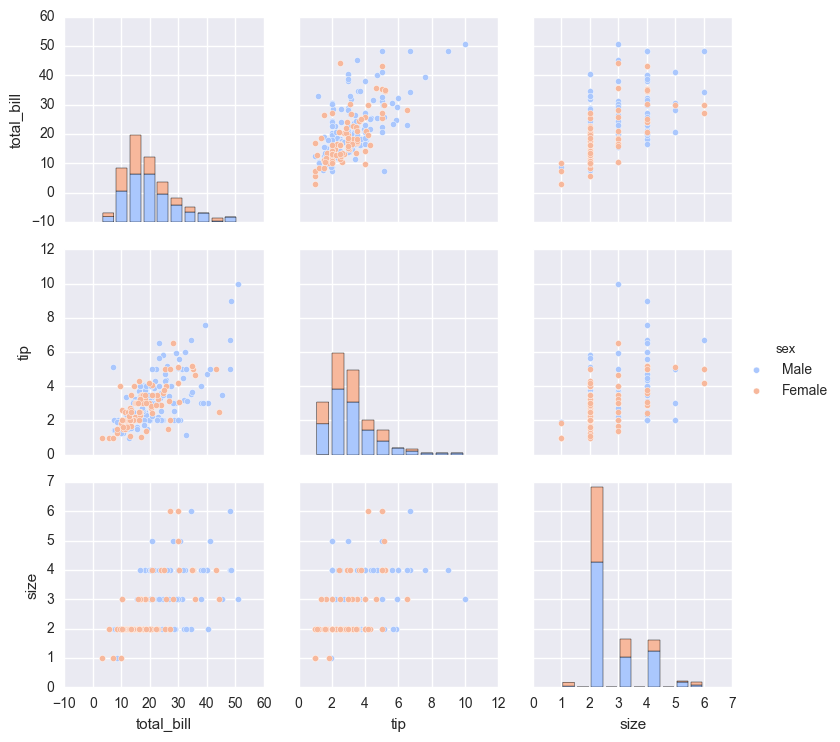

In [18]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

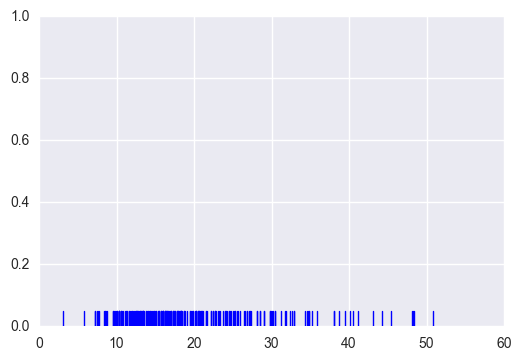

In [19]:
sns.rugplot(tips['total_bill'])

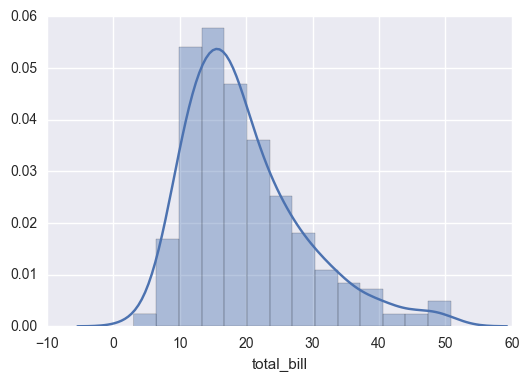

In [21]:
sns.distplot(tips['total_bill'])

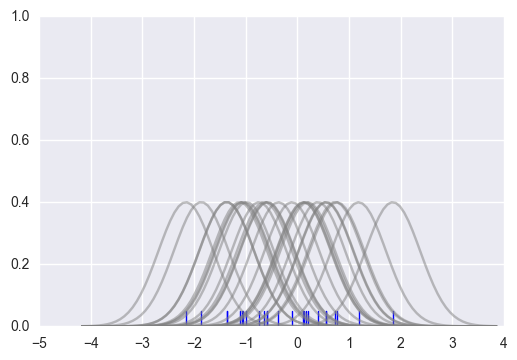

In [32]:
#Don't warry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

#Create another rugplot
sns.rugplot(dataset)

#Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 eqally spaced points from x_min to x_max
x_axis = np.linspace(x_min, x_max, 100)

# Set up the boundwidth, for info on this:
# url = 'http://en.wikipedia.org/wiki/kernel_density_estimation#Practical_estimation_of_the_handwidth''

bandwidth = ((4*dataset.std() ** 5)/(3*len(dataset)))** .2

#Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color = 'grey', alpha=0.5)

    plt.ylim(0,1)

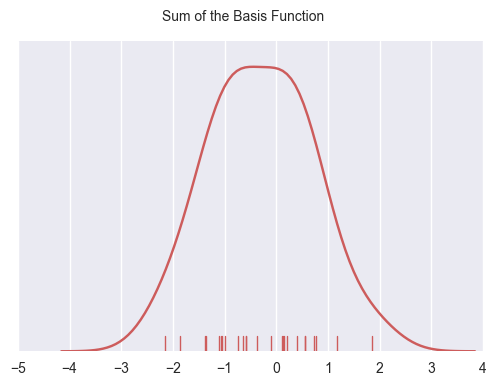

In [33]:
# To get the kde plot we can sum these basis functions:

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list, axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde, color='indianred')

#Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Function")


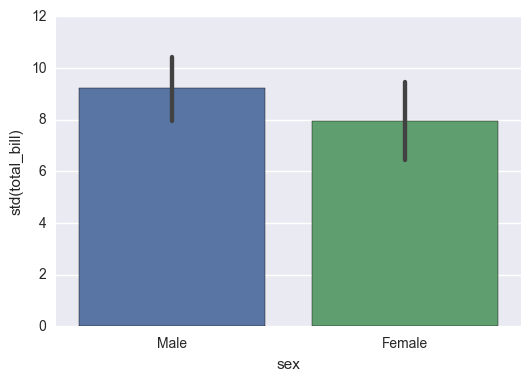

In [36]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

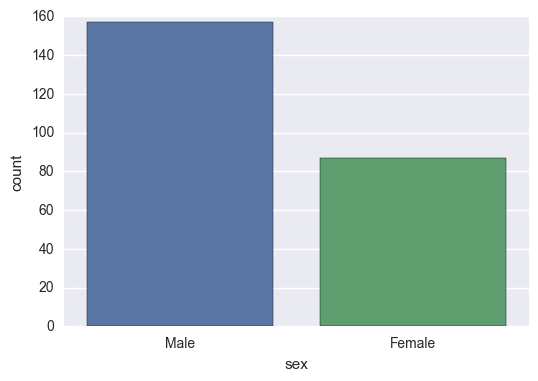

In [37]:
sns.countplot(x='sex', data=tips)

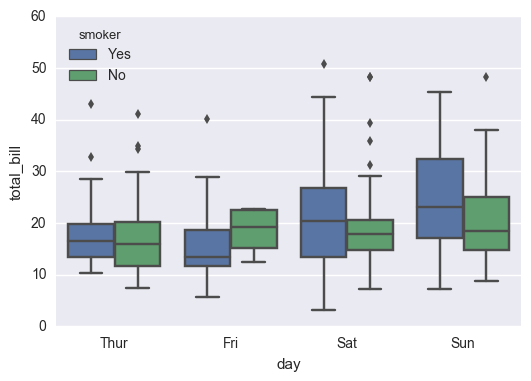

In [42]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

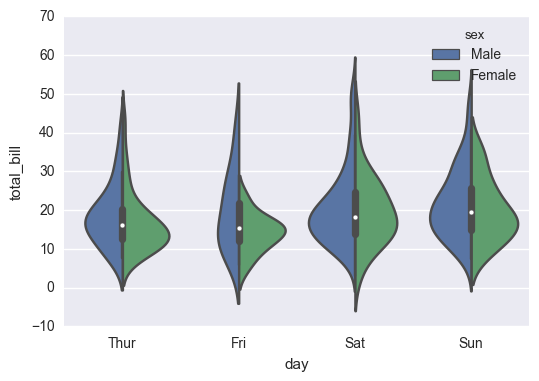

In [48]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

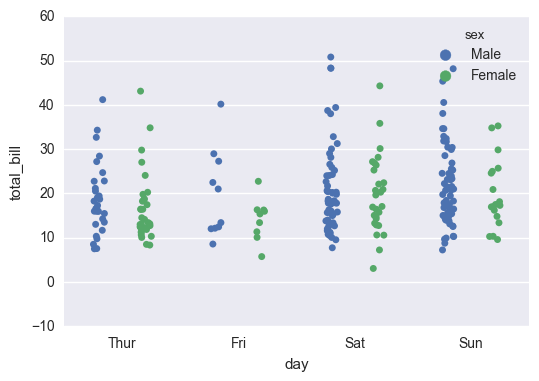

In [53]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', split=True)

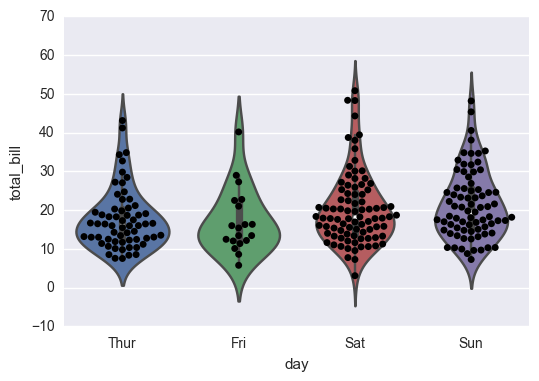

In [55]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

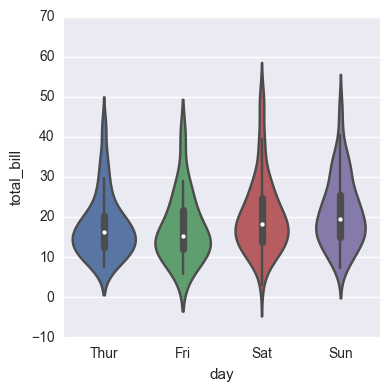

In [58]:
sns.factorplot(x='day', y='total_bill', data=tips,kind='violin')

In [60]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [61]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
tc = tips.corr()

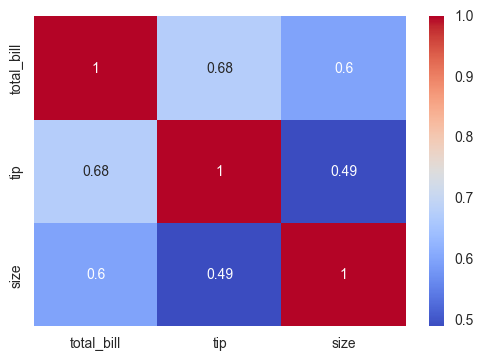

In [68]:

sns.heatmap(tc, annot=True, cmap='coolwarm')

In [70]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

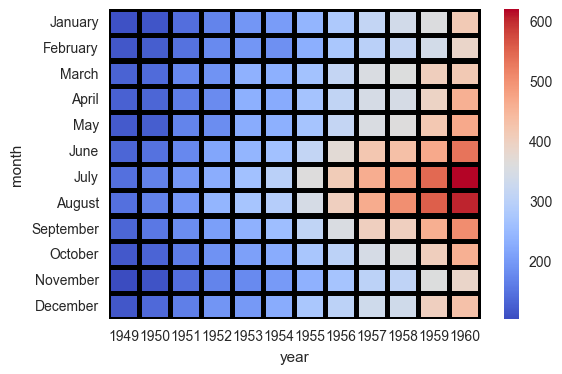

In [76]:
sns.heatmap(fp,cmap='coolwarm', linecolor='black',linewidths=3)

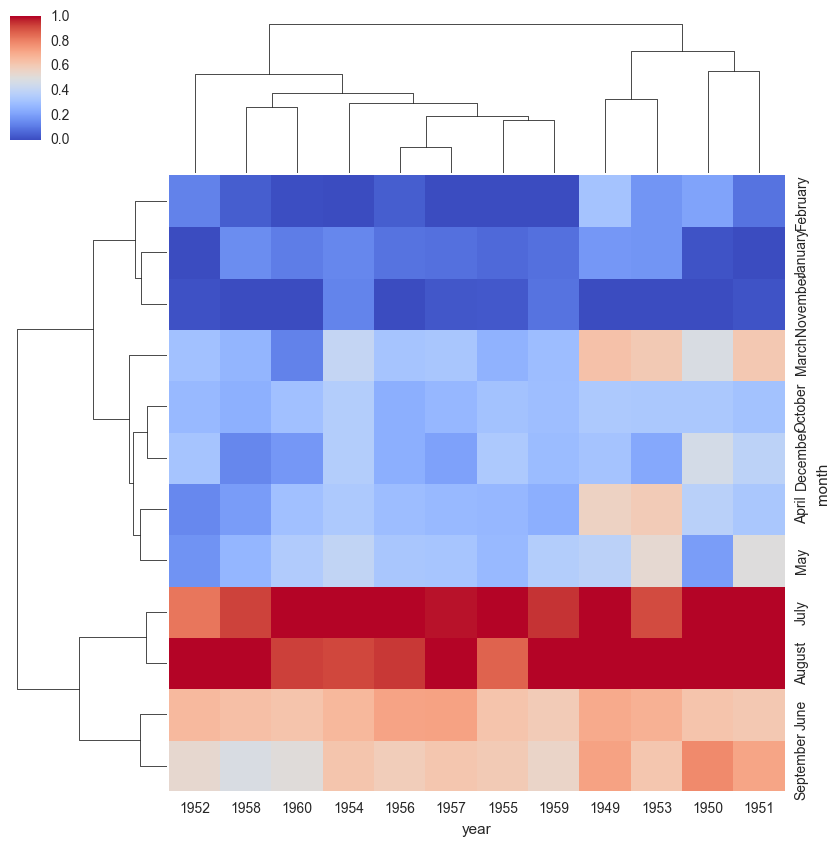

In [79]:
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)

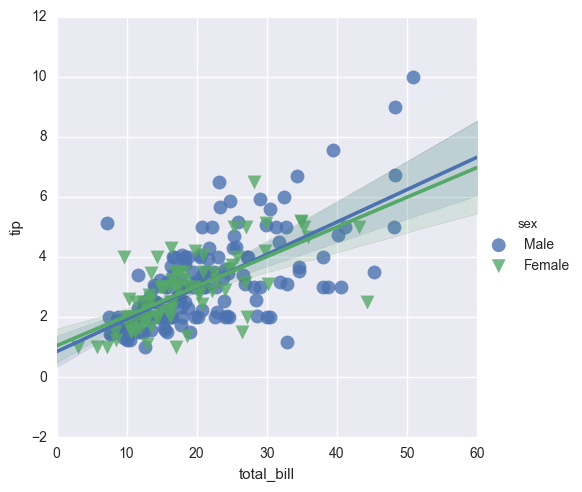

In [83]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'],
          scatter_kws={'s':100})

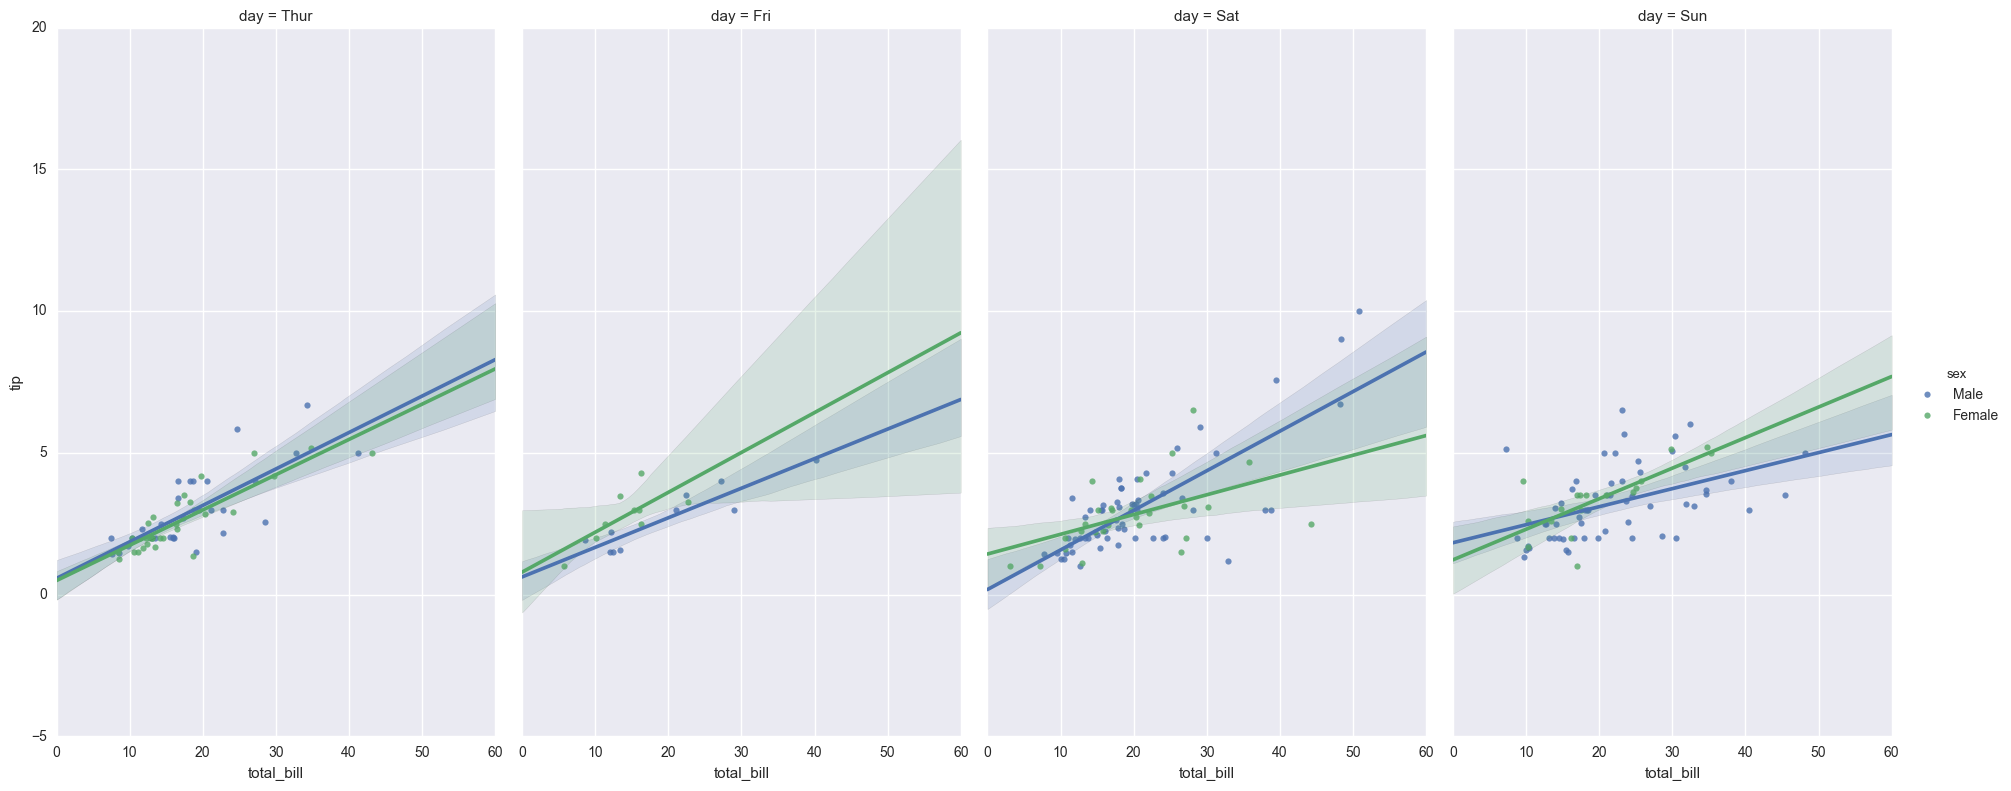

In [93]:
sns.lmplot(x='total_bill', y='tip', data=tips,
           col='day', hue='sex', aspect=0.6, size=8)

In [88]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [94]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [96]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

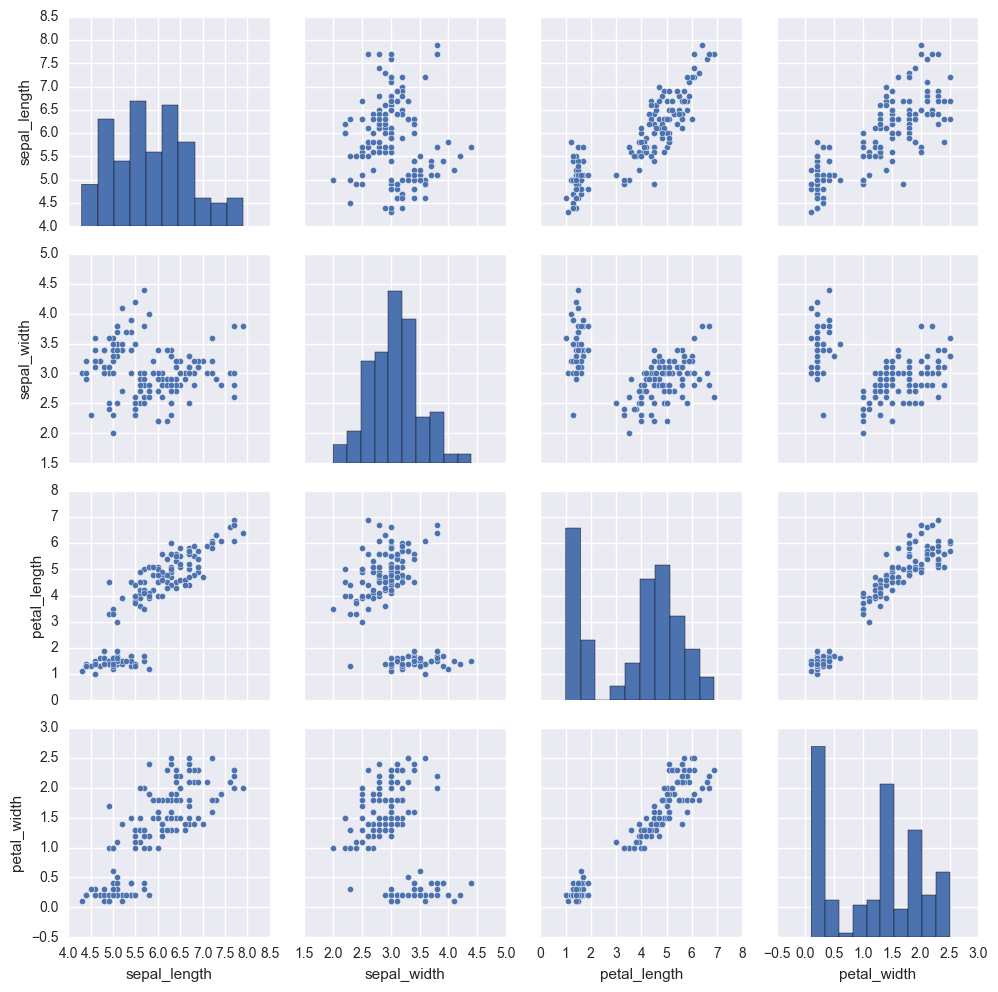

In [98]:
sns.pairplot(iris)

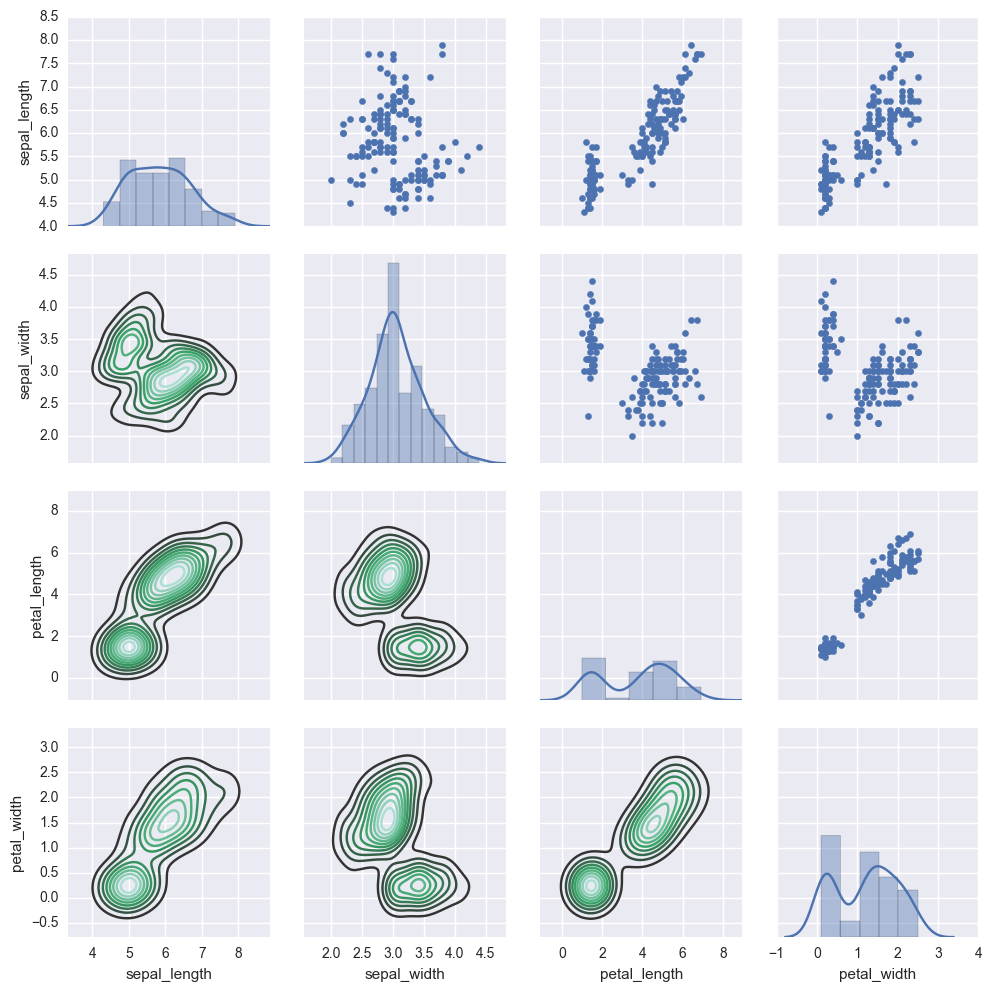

In [104]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)


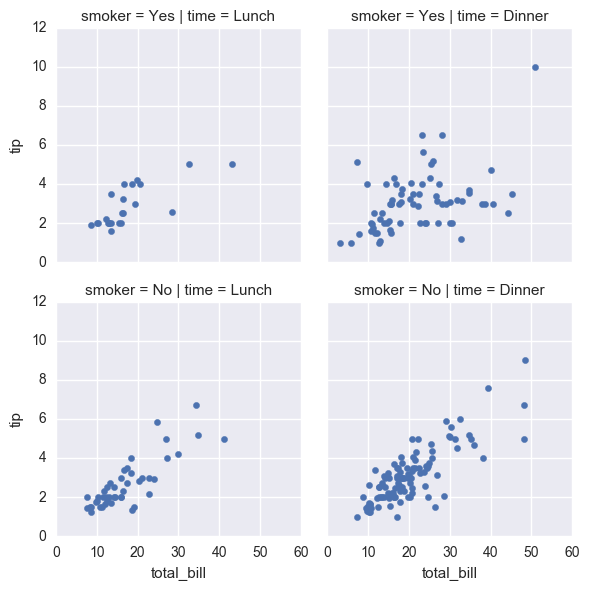

In [110]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

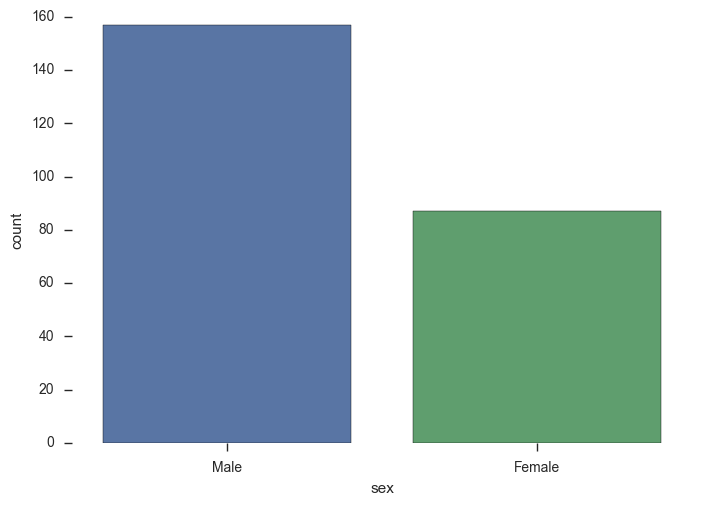

In [126]:
sns.set_context('notebook')
# plt.figure(figsize = (12,3))
# sns.set_style('ticks')
sns.countplot(x = 'sex', data=tips)
sns.despine(left=True, bottom=True)


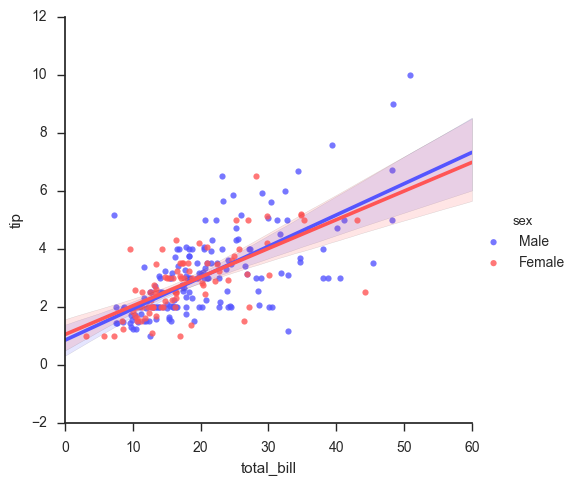

In [128]:

sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='seismic')